In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.linear_model import LogisticRegression

In [2]:
test = np.genfromtxt("data/test.csv", delimiter=',', skip_header=1)
raw_feature_labels = pd.read_csv("data/train.csv", nrows=1).columns.tolist()

In [3]:
raw_train = np.genfromtxt("data/train.csv", delimiter=',', skip_header=1)

train_eval_split = 0.9
np.random.seed(1000)
np.random.shuffle(raw_train)

train_rows = int(raw_train.shape[0] * 0.9)

train, eval = raw_train[:train_rows,:], raw_train[train_rows:,:]

train_x = train[:,1:-1]
train_y = train[:,-1]

eval_x = eval[:,1:-1]
eval_y = eval[:,-1]

raw_feature_labels = raw_feature_labels[:-1]

print(train_x.shape)
print(train_y.shape)
print(eval_x.shape)
print(eval_y.shape)


(40284, 19)
(40284,)
(4476, 19)
(4476,)


In [4]:
class ScoreModel():
    def __init__(self, train_x, train_y, eval_x, eval_y):

        self.train_x = train_x
        self.train_y = train_y
        self.eval_x = eval_x
        self.eval_y = eval_y.astype(int)
    
    def evaluate(self, model):
        model.train(self.train_x, self.train_y)
        model_preds = model.predict(self.eval_x)
        self.score_model(model_preds)

    def score_model(self, model_preds):
        cm = confusion_matrix(self.eval_y, model_preds)
        sns.heatmap(cm, annot=True,)
        plt.show()
        
        accuracy = accuracy_score(self.eval_y, model_preds)
        report = classification_report(self.eval_y, model_preds)
        
        print(f'Accuracy: {accuracy}')
        print(report)

Dummy Model: Predict only most common class

In [5]:
class DummyModel():
    def __init__(self):
        self.most_common_label = None
    
    def train(self, train_x, train_y):
        self.most_common_label = np.bincount(train_y.astype(int)).argmax()

    def predict(self, test_x):
        classes_pred = np.full(test_x.shape[0], self.most_common_label)
        return classes_pred
    
    def predict_for_kaggle(self, test_x):
        preds = self.predict(test_x)
        

In [6]:
class SkLearnLogReg():
    def __init__(self, solver='newton-cg', penalty='l2', C=1.0, class_weight=None, multi_class='auto'):
        self.model = LogisticRegression(solver=solver, penalty=penalty, C=C, class_weight=class_weight, multi_class=multi_class)
    
    def train(self, train_x, train_y):
        self.model.fit(train_x, train_y)
    
    def predict(self, test_x):
        classes_pred = self.model.predict(test_x)
        return classes_pred

In [7]:
class XGBoost():
    def __init__(self, params=None):
        self.model = xgb.XGBClassifier()

    def train(self, train_x, train_y):
        self.model.fit(train_x, train_y)
    
    def predict(self, eval_x):
        return self.model.predict(eval_x)

~~~~~~~DUMMY MODEL~~~~~~~~


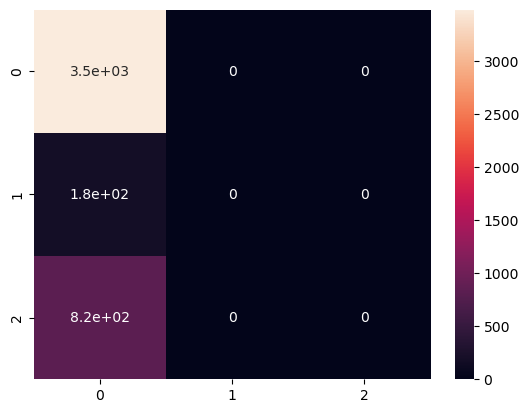

Accuracy: 0.7777033065236819
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      3481
           1       0.00      0.00      0.00       179
           2       0.00      0.00      0.00       816

    accuracy                           0.78      4476
   macro avg       0.26      0.33      0.29      4476
weighted avg       0.60      0.78      0.68      4476



c:\Users\clair\miniconda3\envs\venv_ift6390\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clair\miniconda3\envs\venv_ift6390\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clair\miniconda3\envs\venv_ift6390\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [8]:
score_model = ScoreModel(train_x, train_y, eval_x, eval_y)

print('~~~~~~~DUMMY MODEL~~~~~~~~')
dummy = DummyModel()
score_model.evaluate(dummy)


~~~~~~~MY MODEL~~~~~~~~
epoch 0:      Loss: 1.0986122886681096
epoch 1:      Loss: 1.0965241898777305
epoch 2:      Loss: 1.0944283794858665
epoch 3:      Loss: 1.0926751290500012
epoch 4:      Loss: 1.090790988994876
epoch 5:      Loss: 1.088983159591331
epoch 6:      Loss: 1.0874837321106174
epoch 7:      Loss: 1.0862981798388287
epoch 8:      Loss: 1.0840887391016558
epoch 9:      Loss: 1.0824566268518097
epoch 10:      Loss: 1.081324205490407
epoch 11:      Loss: 1.0800508199214718
epoch 12:      Loss: 1.0791938817036248
epoch 13:      Loss: 1.0773940159740674
epoch 14:      Loss: 1.0770264527685731
epoch 15:      Loss: 1.0747468944182634
epoch 16:      Loss: 1.0748500263509209
epoch 17:      Loss: 1.0733545352837497
epoch 18:      Loss: 1.0705401152101965
epoch 19:      Loss: 1.0717906578394292
epoch 20:      Loss: 1.0692286592517364
epoch 21:      Loss: 1.0694781357651302
epoch 22:      Loss: 1.0679674153213723
epoch 23:      Loss: 1.068174568394549
epoch 24:      Loss: 1.0666410

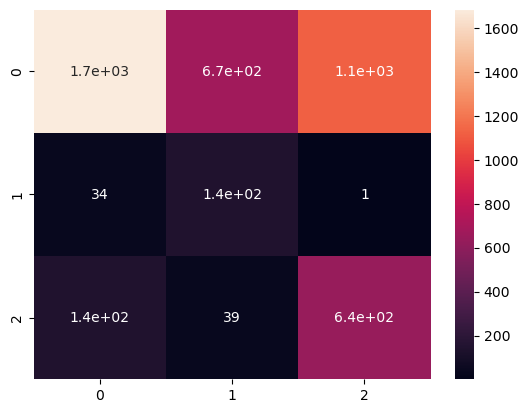

Accuracy: 0.5500446827524575
              precision    recall  f1-score   support

           0       0.91      0.48      0.63      3481
           1       0.17      0.80      0.28       179
           2       0.36      0.78      0.49       816

    accuracy                           0.55      4476
   macro avg       0.48      0.69      0.47      4476
weighted avg       0.78      0.55      0.59      4476



In [9]:
from log_reg import MultiClassLogisticRegression
print('~~~~~~~MY MODEL~~~~~~~~')
my_model = MultiClassLogisticRegression(batch_size=20000, n_steps=100)
score_model.evaluate(my_model)

~~~~~~~SKLEARN LOGREG~~~~~~~~


c:\Users\clair\miniconda3\envs\venv_ift6390\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


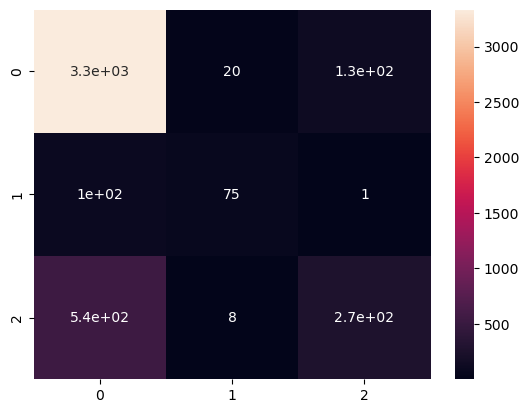

Accuracy: 0.8208221626452189
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      3481
           1       0.73      0.42      0.53       179
           2       0.67      0.33      0.44       816

    accuracy                           0.82      4476
   macro avg       0.75      0.57      0.62      4476
weighted avg       0.80      0.82      0.80      4476



In [10]:
print('~~~~~~~SKLEARN LOGREG~~~~~~~~')
logreg = SkLearnLogReg(solver='newton-cg')
score_model.evaluate(logreg)



~~~~~~~XGBOOST NO TUNING~~~~~~~~


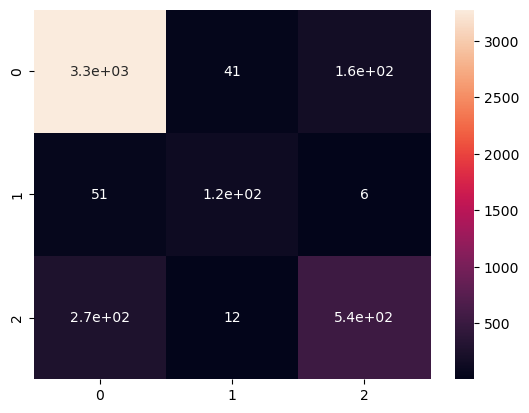

Accuracy: 0.8793565683646113
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3481
           1       0.70      0.68      0.69       179
           2       0.76      0.66      0.71       816

    accuracy                           0.88      4476
   macro avg       0.79      0.76      0.77      4476
weighted avg       0.88      0.88      0.88      4476



In [11]:

print('~~~~~~~XGBOOST NO TUNING~~~~~~~~')
xgbc = XGBoost()
score_model.evaluate(xgbc)